# Credit Card Fraud Detection

In [1]:
# Import pandas and Numpy 
import pandas as pd
import numpy as np

In [2]:
# Let's Load the filepath from the system
data_set = pd.read_csv(r"C:\Users\kapil\Desktop\Data Set\creditcard.csv")

In [3]:
# To quickly check how's our data set looks
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# To check the number of Rows and Columns we use
data_set.shape

(284807, 31)

In [5]:
# To get a concise summary of the dataframe.
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data_set.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


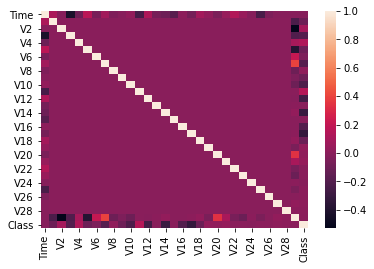

In [7]:
# Let plot the Heat map
import seaborn as sns
sns.heatmap(data_set.corr())

In [8]:
# Calculating the value counts
data_set['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
data_set['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [10]:
# Lets convert the time first seconds to hours
data_set['Time'] = ((data_set['Time']/3600)%24).sort_values(ascending=False).astype(float)
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

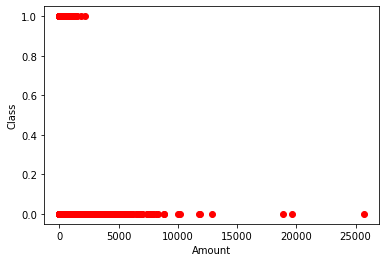

In [12]:
#Lets plot Class values with respect to Amount
plt.scatter(data_set.Amount, data_set.Class,  color='Red')
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

In [13]:
msk = np.random.rand(len(data_set)) < 0.6
train = data_set[msk]
test = data_set[~msk]

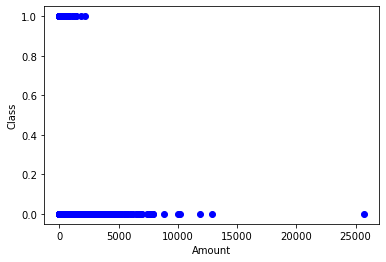

In [14]:
plt.scatter(train.Amount, train.Class,  color='blue')
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

# 1 Applying Multiple Linear Regression

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']])
y = np.asanyarray(train[['Class']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 4.36820240e-05 -1.96240580e-03  2.79666217e-03 -4.92336230e-03
   3.75315387e-03 -2.39157276e-03 -1.62240845e-03 -6.80408660e-03
   8.91922729e-04 -3.56788138e-03 -8.09735143e-03  6.23425630e-03
  -1.09918339e-02 -2.02706424e-04 -1.28959288e-02 -2.37405630e-04
  -9.58602462e-03 -1.66433702e-02 -5.88789984e-03  1.95751967e-03
   1.81013811e-04  2.30143328e-03  2.47390631e-04  3.49124133e-04
  -4.77042926e-04  5.04775651e-04  2.48687361e-04  1.39859163e-03
   1.00275481e-03  7.37751283e-06]]


In [16]:
y_hat= regr.predict(test[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']])
x = np.asanyarray(test[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']])
y = np.asanyarray(test[['Class']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.00
Variance score: 0.52


### Note - The Smaller the residual sum of squares, the better your model fits your data; The Greater the residual sum of squares, the poorer your model fits your data. A value of Zero means your Model is a perfect Fit. 

### Variance measures how far a set of data is spread out. A Variance of Zero indicates that all of the data values are identical. 


# 2 Applying Polynomial Regression

In [19]:
Poly_df=pd.DataFrame(data_set)
Poly_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
msk = np.random.rand(len(Poly_df)) < 0.8
train = Poly_df[msk]
test = Poly_df[~msk]

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']])
train_y = np.asanyarray(train[['Class']])

test_x = np.asanyarray(test[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']])
test_y = np.asanyarray(test[['Class']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.00000000e+00,  0.00000000e+00, -1.35980713e+00, ...,
         4.43231060e-04, -3.14995786e+00,  2.23861444e+04],
       [ 1.00000000e+00,  0.00000000e+00,  1.19185711e+00, ...,
         2.16801158e-04,  3.96080151e-02,  7.23610000e+00],
       [ 1.00000000e+00,  2.77777778e-04, -1.35835406e+00, ...,
         3.57028245e-03, -2.26256320e+01,  1.43383396e+05],
       ...,
       [ 1.00000000e+00,  2.39961111e+01, -1.18811179e+01, ...,
         6.78532697e-01,  6.34272840e-01,  5.92900000e-01],
       [ 1.00000000e+00,  2.39963889e+01, -7.32788671e-01, ...,
         2.86518139e-03, -1.32694398e+00,  6.14544100e+02],
       [ 1.00000000e+00,  2.39977778e+01, -5.33412522e-01, ...,
         1.86292862e-04,  2.96181441e+00,  4.70890000e+04]])

In [22]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[-5.87405439e-11 -6.85105394e-05 -9.62812632e-03  1.09168027e-02
  -2.23076048e-02  1.52515774e-02 -1.69291750e-03 -3.82788212e-03
  -5.61946232e-03  9.11436953e-03 -5.40400227e-02 -2.03752019e-02
  -2.36589738e-02  1.09414782e-01 -9.24861459e-02 -9.96892974e-02
   3.85452384e-02  5.17146368e-03 -9.69626188e-02 -5.77401515e-02
   3.28057852e-02  1.18583432e-02  1.84859969e-02  2.05932820e-02
  -2.44871002e-03  3.73958014e-03  1.56525108e-03  1.16450644e-02
   5.22203944e-03  3.05077826e-03  6.40481963e-06  8.85861862e-07
   7.08065290e-05 -5.65818630e-06  1.13775138e-04 -4.18030165e-05
   1.14805785e-04 -1.27647880e-05  6.22669289e-05 -4.13652047e-05
   8.77757364e-06  7.68834651e-05 -7.85461058e-05  1.30331310e-04
  -4.26921751e-05  4.00832315e-05  3.81856226e-06  1.07552126e-04
   2.00410594e-04  8.73394935e-05 -7.57583596e-06 -4.82792322e-05
  -4.92551258e-05  3.07330634e-05  8.09038140e-05  2.91647391e-06
  -1.74490128e-05 -2.51316155e-05  2.49186413e-05 -3.04430494

In [28]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 0.60


# SVM

In [29]:
SVM=pd.DataFrame(Poly_df)
SVM.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
feature_df = SVM[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]
X = np.asarray(feature_df)
X[0:5]

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,
         2.53634674e+00,  1.37815522e+00, -3.38320770e-01,
         4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
         3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
        -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
         1.46817697e+00, -4.70400525e-01,  2.07971242e-01,
         2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
        -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
         6.69280749e-02,  1.28539358e-01, -1.89114844e-01,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01,
         1.66480113e-01,  4.48154078e-01,  6.00176493e-02,
        -8.23608088e-02, -7.88029833e-02,  8.51016549e-02,
        -2.55425128e-01, -1.66974414e-01,  1.61272666e+00,
         1.06523531e+00,  4.89095016e-01, -1.43772296e-01,
         6.35558093e-01,  4.63917041e-01, -1.14804663e-01,
        -1.83361270e-01, -1.45783041e-01, -6.90831352e-

In [34]:
y = np.asarray(SVM['Class'])
y [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (227845, 30) (227845,)
Test set: (56962, 30) (56962,)


In [36]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [37]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.42      0.57       101

    accuracy                           1.00     56962
   macro avg       0.95      0.71      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix, without normalization
[[56856     5]
 [   59    42]]


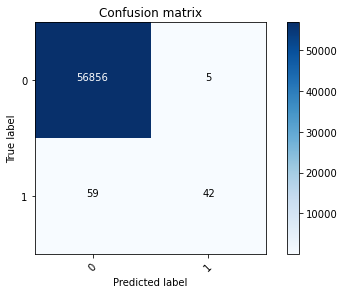

In [41]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

In [42]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9986717375102987

In [45]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.39622641509433965